<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Polyfit_%EC%98%88%EC%A0%9C_2_%EC%82%AC%EA%B0%81%EB%BF%94_%EB%B6%80%ED%94%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의

Polyfit을 이용한 외삽법의 예제로 구분구적법을 살펴봅시다.

<img src="https://drive.google.com/uc?id=15B5o6uUQvExKxNexMGun0jwmZMLjTg4v"
 width=300 height=300>

밑변의 가로 세로가 a, b, 높이가 c인 사각뿔의 부피는 기하학적으로 $$ \dfrac{1}{3} abc $$ 로 구할 수 있습니다.

이것을 구분구적법(quadrature)의 극한으로 구해도 올바른 결과가 나오는지 확인해 보겠습니다.

<img src="https://drive.google.com/uc?id=1NhAr0jd9hxq7yD0RmZHXFZRoKYePEu4p" width=350 height=300>

먼저 높이를 N개의 구간으로 잘라 $$h=\dfrac{1}{N}$$ 라 하고, 맨 밑에서부터 $k$번째 $ (0\le k \lt N)$ 직육면체의 부피 $$V(k;h)=a(1-\dfrac{k}{N})\times b(1-\dfrac{k}{N})\times c/N = abc(1-kh)^2 h$$ 룰 $k=0$부터 $k=N-1$까지 더하는 것으로 직사각뿔의 부피의 근삿값을 구해보겠습니다. 즉,
$$V(h)=\sum_{k=0}^{N-1} abc(1-kh)^2 h$$를 h에 대한 함수로 구하여 $h\rightarrow 0$으로 가는 극한 $$\lim_{h\rightarrow0}V(h)$$을 구해보겠습니다.

## 1. 기호식 유도

In [ ]:
import sympy as sym

In [ ]:
a, b, c, N, k = sym.symbols("a b c N k")

In [ ]:
h = 1/N
h

1/N

$$V_{k} = a_k \times b_k \times c/N$$

In [ ]:
ak = a*(1-k*h)
bk = b*(1-k*h)
Vk = ak*bk*h*c
Vk

a*b*c*(1 - k/N)**2/N

$$V_{N} = \sum_{k=0}^{N-1} \dfrac{abc\left(1-\frac{k}{N}\right)^2}{N}$$

In [ ]:
Vn = sym.Sum(Vk,(k,0,N-1))
Vn

Sum(a*b*c*(1 - k/N)**2/N, (k, 0, N - 1))

In [ ]:
VN = Vn.doit().expand()
VN

a*b*c/3 + a*b*c/(2*N) + a*b*c/(6*N**2)

$$ V = \lim_{N \rightarrow \infty} V_{N} $$

In [ ]:
V = sym.limit(VN, N, sym.oo)
V

a*b*c/3

## 수치적 해법

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vol_pyramid = sym.lambdify((a,b,c),V)

In [ ]:
quad_pyramid = sym.lambdify((a,b,c,N), Vn)

In [ ]:
'''
구간 갯수 N의 리스트
'''
Ns = np.arange(1,6)
Ns

array([1, 2, 3, 4, 5])

In [ ]:
'''
N의 역수 h=1/N의 리스트
'''
hs=1.0/Ns
hs

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])

In [ ]:
'''
구간 갯수 N에 대한 구적값 V의 리스트
'''

a0,b0,c0 = 1,1,1
Vs = [quad_pyramid(a0,b0,c0,N) for N in Ns]
Vs

[1.0, 0.625, 0.5185185185185186, 0.46875, 0.4400000000000001]

In [ ]:
'''
hs와 Vs를 다항식으로 피팅한 계수 리스트를 구하여 pc에 저장합니다.
(pc: polynomial coefficients에서 머리글자를 따옴)
'''
pc = np.polyfit(hs,Vs,4)
pc

array([ 2.57174375e-13, -5.19329032e-13,  1.66666667e-01,  5.00000000e-01,
        3.33333333e-01])

In [ ]:
'''
계수 리스트 pc를 이용해 다항함수 Vf를 만들어줍니다.
'''
Vf = np.poly1d(pc)
print(Vf)

           4             3          2
2.572e-13 x - 5.193e-13 x + 0.1667 x + 0.5 x + 0.3333


In [ ]:
'''
다항함수 Vf를 그래프로 그려보기 위해 h의 적절한 구간에 대한 배열을 생성해 준다
'''
hd = np.linspace(-.2, 1.2, 101)

In [ ]:
'''
Vf의 치역 Vd를 생성해 준다
'''
Vd = Vf(hd)

## 외삽법 적용

이제 Vf()를 $h\rightarrow 0$인 경우에 대해 외삽해 봅시다.

In [ ]:
'''
h -> 0 일 대의 외삽값
'''
Vf(0)

0.3333333333333419

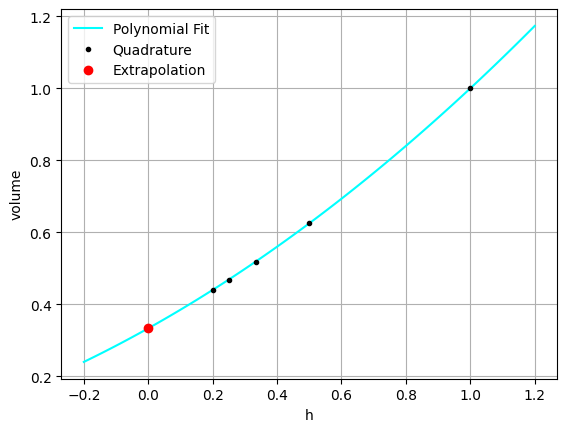

In [ ]:
'''
Polynomial Fit: 피팅 함수
Quadruture:     구적값 목록
Extrapolation:  외삽값
을 h에 대해 그래프로 그려 본다:
'''
plt.plot(hd, Vd,color="cyan")
plt.plot(hs,Vs,"k.")
plt.plot([0],[Vf(0)],"ro")
plt.legend(["Polynomial Fit","Quadrature","Extrapolation"])
plt.xlabel("h")
plt.ylabel("volume")
plt.grid()

In [ ]:
'''
참값을 수치로 구하여 Vt에 저장
'''
Vt = vol_pyramid(a0,b0,c0)
Vt

0.3333333333333333

상대오차는 참값에 대한 근삿값과 참값의 차이의 비로 구할 수 있습니다:

$\mathrm{상대오차}=\dfrac{\mathrm{근삿값}-{\mathrm{참값}}}{\mathrm{참값}}$

In [ ]:
'''
상대오차
'''
print(f"Relative Error = {(Vf(0)-Vt)/Vt:.2g}.")

Relative Error = 2.6e-14.


앞에서는 구적법으로 구한 부피가 실제 V보다 큰 값에서 h가 0으로 가는 극한을 살펴봤는데요, 이번에는 V보다 작은 값쪽에서 다가가는 경우도 살펴보겠습니다.

<img src="https://drive.google.com/uc?id=1QL2j-Gweg3J5AK9DJ8TGiW2iT1cuxwPU" width=350 height=300>

k 값을 1부터 N까지 옮겨가며 구적법을 적용하면 되는데요, 즉
$$V(h_{-})=\sum_{k=1}^{N} abc(1-hk)^2 h$$라 하고, 앞에서 구한 값은 $$V(h_{+})=\sum_{k=0}^{N-1} abc(1-kh)^2 h$$라 하겠습니다.

In [ ]:
Vs_pos = Vs

Vn_neg = sym.Sum(Vk,(k,1,N))
Vn_neg

Sum(a*b*c*(1 - k/N)**2/N, (k, 1, N))

In [ ]:
VN_neg = Vn_neg.doit().expand()
VN_neg

a*b*c/3 - a*b*c/(2*N) + a*b*c/(6*N**2)

In [ ]:
quad_pyramid_neg = sym.lambdify((a,b,c,N), VN_neg)

Vs_neg = [quad_pyramid_neg(a0,b0,c0,N) for N in Ns]
Vs_neg

[-2.7755575615628914e-17,
 0.12499999999999997,
 0.18518518518518517,
 0.21874999999999997,
 0.23999999999999996]

In [ ]:
pc_neg =np.polyfit(hs, Vs_neg,4)
pc_neg

array([ 5.73748078e-14, -1.16947583e-13,  1.66666667e-01, -5.00000000e-01,
        3.33333333e-01])

In [ ]:
Vf_neg=np.poly1d(pc_neg)
print(Vf_neg)

           4             3          2
5.737e-14 x - 1.169e-13 x + 0.1667 x - 0.5 x + 0.3333


In [ ]:
Vd_neg = Vf_neg(hd)

In [ ]:
'''
h -> 0 일 때의 외삽값
'''
Vfn=Vf_neg(0)
Vfn

0.3333333333333352

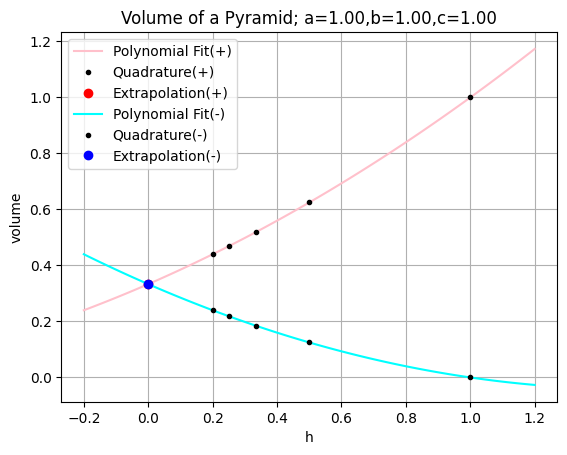

In [ ]:
plt.plot(hd, Vd, color="pink")
plt.plot(hs,Vs_pos,"k.")
plt.plot([0],[Vf(0)],"ro")
plt.plot(hd, Vd_neg,color="cyan")
plt.plot(hs,Vs_neg,"k.")
plt.plot([0],[Vf_neg(0)],"bo")
plt.title(f"Volume of a Pyramid; a={a0:.2f},b={b0:.2f},c={c0:.2f}")
plt.legend(["Polynomial Fit(+)","Quadrature(+)","Extrapolation(+)","Polynomial Fit(-)","Quadrature(-)","Extrapolation(-)"])
plt.xlabel("h")
plt.ylabel("volume")
plt.grid()

In [ ]:
'''
참값 (Vt)에 대한 상대오차
'''
print(f"Relative Error(-) = {(Vfn-Vt)/Vt:.2g}.")

Relative Error(-) = 5.7e-15.


구분구적법으로 참값에 가까워질 정도로 구간을 세밀하게 쪼개지 못했어도, 구간값의 변화에 따른 계산값의 변화 추이로부터 다항식 근사를 하고, 이를 바탕으로 외삽법을 이용하면 참값에 근접한 값을 얻을 수 있음을 알 수 있습니다.
